# Bag of Words model

In [1]:
import numpy as np
import pandas as pd
import re
import string

### Import datasets

In [2]:
data_imdb = pd.read_csv('datasets/sentiment labelled sentences/imdb_labelled.txt', delimiter='\t', header=None) # Header = None: ensures that the first data entry is not the column name
data_imdb.columns = ['Review Text', 'Review Class']
data_imdb

,Review Text,Review Class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [3]:
data_amazon = pd.read_csv('datasets/sentiment labelled sentences/amazon_cells_labelled.txt', delimiter='\t', header=None) # Header = None: ensures that the first data entry is not the column name
data_amazon.columns = ['Review Text', 'Review Class']
data_amazon

,Review Text,Review Class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [4]:
data_yelp = pd.read_csv('datasets/sentiment labelled sentences/yelp_labelled.txt', delimiter='\t', header=None) # Header = None: ensures that the first data entry is not the column name
data_yelp.columns = ['Review Text', 'Review Class']
data_yelp 

,Review Text,Review Class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
data = pd.concat([data_imdb, data_amazon, data_yelp])
data

,Review Text,Review Class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Importing required packages

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## Understanding some functions

In [7]:
string.punctuation # Returns all the punctations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
str.maketrans('','',string.punctuation) # Creates a table usable for str.translate()

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [9]:
data['Review Text'].values

array(['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
       'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
       'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
       ..., 'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",
       "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype=object)

In [10]:
x = 'fdjfksj%$#@'
re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", x) # Removes all punctuation, or replaces all punctuation with empty string

'fdjfksj'

In [11]:
x = 'hello let us meet today'
x.split()

['hello', 'let', 'us', 'meet', 'today']

In [12]:
x = 'Ad'
y = ':dk'
z = 'Adsf f' # Contains space
x.isalpha(), y.isalpha(), z.isalpha() # Checks if string only contains alphabets

(True, False, False)

In [13]:
stopwords_eng = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

## Cleaning text

In [14]:
def clean_text(df):
    all_reviews = list() # Empty list
    lines = df['Review Text'].values.tolist() # List version of output of previous cell
    for text in lines: # Iterating across all the review texts
        text = text.lower() # First convert to lower case
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') 
        # Returns a object contatining details of the characters in square brackets in it
        # Aims at removing all HYPERLINKS
        # For reference check - https://www.geeksforgeeks.org/regular-expression-python-examples-set-1/

        text = pattern.sub('', text) 
        # Replaces all the substrings where the above characters (hyperlinks) are present, with '' (Empty string)
        # pattern.subn would return a tuple where it shows all the places the pattern substring is replaced

        # Removing emojis
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)

        # Changing short forms to the full words to obtain the pronouns
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)

        # Replacing all these values below (punctuations) with empty string
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text) 

        # tokens = word_tokenize(text) # Split the sentences by spaces - and returns a list (rather than strings when using split() function)
        tokens = text.split()
        
        table = str.maketrans('','', string.punctuation) # Returns a translation table usable for str.translate()
        stripped = [w.translate(table) for w in tokens] # Removes the remaining punctuation just in case we missed any
        words = [word for word in stripped if word.isalpha()] # Excluding non-alphabets (especially numbers in this case)

        stop_words = set(stopwords_eng) # To remove all the common and frequently used words in English
        stop_words.discard("not") # Since not is a word required to judge the sentiment, we shall not remove the word 'not'
        # words = [w for w in words if not w in stop_words] # Can choose to remove or not remove the stop_words

        PS = PorterStemmer()
        words = [PS.stem(w) for w in words if not w in stop_words] # To obtain the root words (E.g. loving, loved lover etc. would become 'lov')
        words = ' '.join(words) # To create one sentence with a space between each word
        all_reviews.append(words)
    return all_reviews

In [17]:
df1 = pd.DataFrame(["I'll suggest you to open https://www.google.com/ and search NERDY WITS"])
df1.columns = ["Review Text"]
cleaned_text1 = clean_text(df1)
cleaned_text1

['suggest open search nerdi wit']

In [18]:
all_reviews = clean_text(data)
all_reviews

['slowmov aimless movi distress drift young man',
 'not sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act postproduct edit direct aspect filmmak',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film some

### Importing Scikit-learn package

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [20]:
CV = CountVectorizer(min_df = 2) # Taking all the words which have occured atleast 3 times
X = CV.fit_transform(all_reviews).toarray()
y = data['Review Class'].values.reshape(-1,)

In [21]:
X # It is basically the entire vocabulary (1209 words in this case) and the number of times a word is used in the sentence

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
X.shape, y.shape

((2748, 1763), (2748,))

## ML Training

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [25]:
rf = RandomForestClassifier(500, n_jobs=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=10)

In [26]:
y_pred = rf.predict(X_test)

In [27]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"F1 score = {f1_score(y_test, y_pred)*100:.2f}%")

Accuracy = 79.82%
F1 score = 78.36%


<AxesSubplot:>

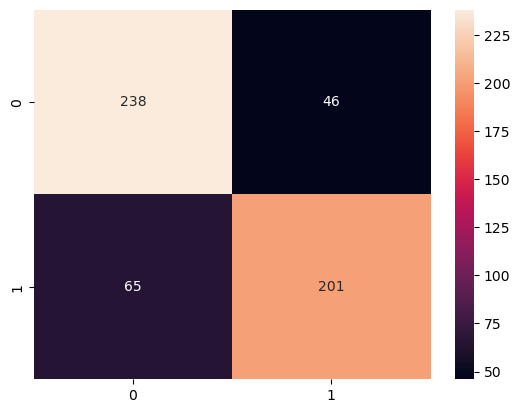

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g')

# TF-IDF

**TF:** Term Frequency

$$TF(d_j^i) = \frac{\text{Frequency of }d_j^i\text{ in }d_i}{\text{Number of words in }d_i}$$

**IDF:** Inverse Document Frequency

$$IDF(w) = \log \bigg(\frac{\text{Number of documents in corpus (samples in dataset)}}{\text{Number of documents that contain the word }w}\bigg)$$

Finally - 
$$[TF-IDF](d_j^i) = TF(d_j^i) \times IDF(d_j^i)$$
-------------------------
$$\text{Each sample in the Dataframe is a document, where $d_j^i$ represents the $i^{th}$ word in th $j^{th}$ document/sample in the dataset}$$



In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer(min_df = 2) # Taking all the words which have occured atleast 3 times
X = TFIDF.fit_transform(all_reviews).toarray()
y = data['Review Class'].values.reshape(-1,)

In [30]:
X[0, 900:1000] # Instead of the word frequency, we will have the word's TF-IDF value

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.4866132, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
rf = RandomForestClassifier(500, n_jobs=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=10)

In [32]:
y_pred = rf.predict(X_test)

<AxesSubplot:>

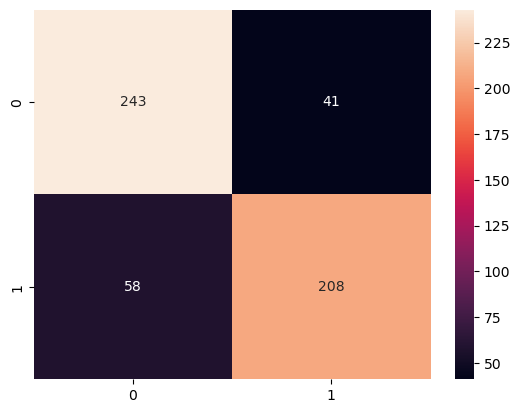

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g')

In [35]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"F1 score = {f1_score(y_test, y_pred)*100:.2f}%")

Accuracy = 82.00%
F1 score = 80.78%


Score has improved